# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

import pickle

import seaborn as sb
sb.set_context("notebook")
sb.set() # pretty plots

Here we read the `tsv` file keep only the paper which have an id which begin with 'conf' (means that the paper is published in a conference and the we create the conference column by splitting the id arround '/'

In [2]:
dblp = pd.read_csv('data/dblp.tsv', sep='\t')
dblp = dblp[dblp["id"].str.startswith('conf')]
dblp['conference'] = dblp.id.str.split('/', expand=True)[1]
dblp.head()

,id,authors,year,title,conference
2049192,conf/pfe/KnauberT01,"['Peter Knauber', 'Steffen Thiel']",2001.0,Session Report on Product Issues in Product Fa...,pfe
2049193,conf/pfe/BachmannGLNPRV03,"['Felix Bachmann', 'Michael Goedicke', 'Julio ...",2003.0,A Meta-model for Representing Variability in P...,pfe
2049194,conf/pfe/GomaaH03,"['Hassan Gomaa', 'Mohamed Hussein 0002']",2003.0,Dynamic Software Reconfiguration in Software P...,pfe
2049195,conf/pfe/KnauberBBLLNSW01,"['Peter Knauber', 'Jesús Bermejo Muñoz', 'Günt...",2001.0,Quantifying Product Line Benefits.,pfe
2049196,conf/pfe/HallsteinsenFS03,"['Svein O. Hallsteinsen', 'Tor Erlend Fægri', ...",<em>2003.0</em>,Patterns in Product Family Architecture Design.,pfe


In [3]:
ai_conferences = pd.read_csv('data/list_of_ai_conferences.txt', names=['name'])
dblp = dblp[dblp['conference'].isin(ai_conferences['name'])]

Here are the total number of papers and the number of paper published in each conference

In [4]:
print("There are {} papers in the dataset".format(dblp.shape[0]))
dblp.conference.value_counts()

There are 102003 papers in the dataset


icra      21585
cvpr      12853
aaai      10796
ijcai      9669
nips       8445
acl        6330
icml       5017
iconip     4985
iccv       4179
naacl      3310
emnlp      3299
icann      3134
accv       2390
fgr        1383
pricai     1372
iccbr       863
ida         712
ilp         679
ksem        635
aamas       367
Name: conference, dtype: int64

### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

Because the list is seen as a single string we must remove the brackets and '

In [5]:
dblp.authors = dblp.authors.str.strip('[]')

We create a new dataframe which contains the of the paper and the name of the author

In [6]:
authors = pd.DataFrame(dblp.authors.str.split(',', expand=True), index=dblp.index).stack()
authors = authors.reset_index()
authors = authors.drop(columns=['level_1'])
authors.columns = ['id', 'author']
authors.author = authors.author.str.replace("'", "")
authors = authors.drop(authors[authors.author == ''].index, axis=0)
authors.head()

,id,author
0,2049312,Yoshinori Kuno
1,2049312,Yasukazu Okamoto
2,2049312,Satoshi Okada
3,2049313,Sundar Vedula
4,2049313,Simon Baker


We marge the new created dataset and the dblp dataset to create the desired table

In [7]:
authors = pd.merge(authors, dblp.drop(columns=['authors']), left_on="id", right_index=True)
authors = authors.drop(columns=['id', 'id_x'])
authors = authors.rename(columns={'id_y':'id'})
authors.author = authors.author.str.strip()
authors.head()

,author,id,year,title,conference
0,Yoshinori Kuno,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv
1,Yasukazu Okamoto,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv
2,Satoshi Okada,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv
3,Sundar Vedula,conf/iccv/VedulaBRCK99,1999.0,Three-Dimensional Scene Flow.,iccv
4,Simon Baker,conf/iccv/VedulaBRCK99,1999.0,Three-Dimensional Scene Flow.,iccv


In [8]:
print("There is {} unique authors".format(len(authors.author.unique())))

There is 105817 unique authors


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

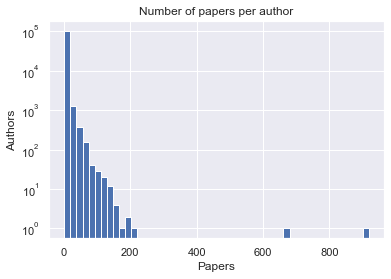

In [9]:
fig, ax = plt.subplots()
authors.author.value_counts().hist(ax = ax, bins=50)
ax.set_title("Number of papers per author")
ax.set_xlabel("Papers")
ax.set_ylabel("Authors")
ax.set_yscale('log')

In [10]:
authors['author'].value_counts().head()

Sheila A. McIlraith        918
Satinder P. Singh (ed.)    663
Luc Van Gool               220
Toshio Fukuda              196
Thomas S. Huang            186
Name: author, dtype: int64

We can see that there is 2 main outliers : Sheila A. McIlraith which has 918 papers and Satinder P. Singh (ed.) which has 663 papers. 
Let analyse these two authors.

### Sheila A. McIlraith
We will first try to figure out when she published the most of its paper

In [11]:
sheila = authors[authors.author == 'Sheila A. McIlraith']
sheila.year.value_counts().head()

2018.0    893
2016.0      3
2013.0      2
2007.0      2
'17         2
Name: year, dtype: int64

In [12]:
sheila.conference[sheila.year == '2018.0'].value_counts()

aaai     890
ijcai      2
icml       1
Name: conference, dtype: int64

we can see that 890 papers out of 918 published by Sheila A. McIlraith are published in the 2018 aaai conference which is impossible. Indeed after some research on the web it appears that she was the progam chairs of the conference and that's why she was cited as co-author in most of article of this conference.

### Satinder P. Singh
We will do the same for Satinder P. Singh

In [13]:
satinder = authors[authors.author == 'Satinder P. Singh (ed.)']
satinder.head()

,author,id,year,title,conference
101431,Satinder P. Singh (ed.),conf/aaai/Harrison-Trainor17,2017.0,Preferential Structures for Comparative Probab...,aaai
101584,Satinder P. Singh (ed.),conf/aaai/LecatLL17,2017.0,New Lower Bound for the Minimum Sum Coloring P...,aaai
101594,Satinder P. Singh (ed.),conf/aaai/ChakrabortiTFCK17,2017.0,UbuntuWorld 1.0 LTS - A Platform for Automated...,aaai
101599,Satinder P. Singh (ed.),conf/aaai/HeP17,2017.0,Weakly Supervised Learning of Part Selection M...,aaai
101650,Satinder P. Singh (ed.),conf/aaai/Luger17,2017.0,Beyond Mechanical Turk: Using Techniques from ...,aaai


In [14]:
satinder.conference[satinder.year == '2017.0'].value_counts()

aaai    663
Name: conference, dtype: int64

Satinder P. Singh occupied the program chair of the 2017 edition of the aaai conference. It explains the huge number of paper.

We then delete all the papers of the author centric dataframe where the author is Satinder P. Singh or Sheila A. McIlraith and which were published in aaai 2017 or 2018.

In [15]:
authors = authors.drop(authors.query("author == 'Sheila A. McIlraith' and year=='2018.0' and conference=='aaai'").index, axis=0)
authors = authors.drop(authors.query("author == 'Satinder P. Singh (ed.)' and year=='2017.0' and conference=='aaai'").index, axis=0)

Here we plot the histogram of the number of papers. We scale the y axis by taking the logarithm because there are many authors who only published 1 papers

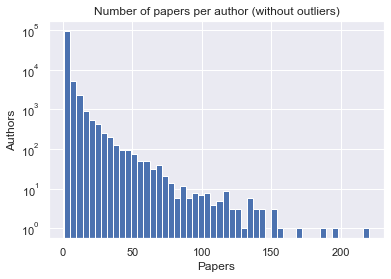

In [16]:
fig, ax = plt.subplots()
authors.author.value_counts().hist(ax = ax, bins=50)
ax.set_title("Number of papers per author (without outliers)")
ax.set_xlabel("Papers")
ax.set_ylabel("Authors")
ax.set_yscale('log')

***A3.2***

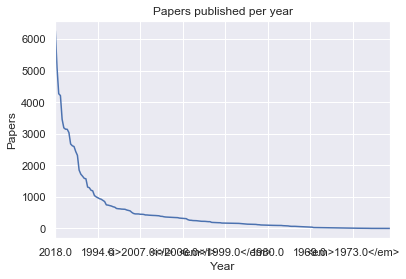

In [17]:
dblp.year.value_counts().plot()
plt.title("Papers published per year")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.show()

In [18]:
dblp.year.unique()

array(['1990.0', '1999.0', '2017.0', '2013.0', '2007.0', '1993.0',
       '1998.0', '2011.0', '2001.0', '2005.0', '2015.0', '2007', '2013',
       '2009.0', '2011', '1995.0', '2001', '1998', '<i>2015.0</i>',
       '<i>2001.0</i>', '<i>2009.0</i>', '<em>2007.0</em>',
       '<i>1999.0</i>', '1990', '2017', '2009', '<i>2007.0</i>', "'11",
       '<i>2011.0</i>', '<i>1988.0</i>', "'09", '<em>2001.0</em>', "'05",
       '<em>1995.0</em>', '<em>2017.0</em>', '<em>2009.0</em>', "'13",
       '<em>2013.0</em>', '<i>1998.0</i>', '<i>2013.0</i>', '2003.0',
       '<i>2005.0</i>', '1988.0', "'07", '<em>2015.0</em>', "'17",
       '<i>2017.0</i>', '<em>1993.0</em>', "'15", "'01",
       '<em>1998.0</em>', "'95", '<em>1990.0</em>', "'03", "'88",
       '<em>2003.0</em>', "'98", '<i>1990.0</i>', '<i>1995.0</i>', "'93",
       '<em>2011.0</em>', '<em>1999.0</em>', '<i>2003.0</i>', "'99",
       '<em>1988.0</em>', "'90", '<em>2005.0</em>', '<i>1993.0</i>',
       "'04", "'08", '2012.0', '2008.0', '<

We can see that the year is formatted in a lot of different ways (4 digits, with html tags, with two digits). We will first remove the html tags

To clean the year we first remove the html tag then we parse the year of format '2019' and '2019.0', all 'year' values that don't fit in this format will be set to NaN. Finally we parse the year of format "'19" by filtering on the NaN values.

In [19]:
type(dblp.year)

pandas.core.series.Series

In [20]:
dblp.year = dblp.year.str.replace(r'<[^<]+?>', '')
year = pd.to_datetime(dblp.year, exact=False,format="%Y", errors="coerce")
year[year.isnull()] = pd.to_datetime(dblp.year[year.isnull()], format="'%y", errors="coerce")
dblp.year = year.dt.year

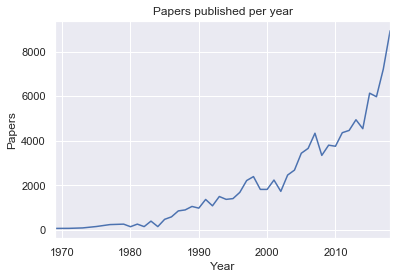

In [21]:
dblp.year.value_counts().sort_index().plot()
plt.title("Papers published per year")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.show()

***A3.3***

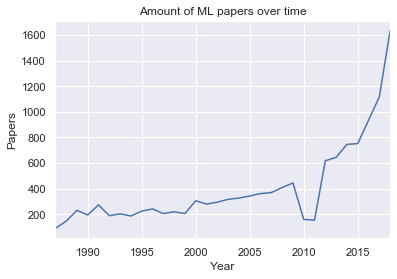

In [22]:
mlconf = ['icml', 'nips']
ml_papers = dblp[dblp.conference.isin(mlconf)]
ml_papers.year.value_counts().sort_index().plot()
plt.title("Amount of ML papers over time")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.show()

We can see that there is a problem in 2010 and 2011 because the number of ML paper decrease a lot during these two years before having an increasing value again. Let's analyse these two years :

In [23]:
print(ml_papers[ml_papers.year == 2010].conference.value_counts())
print(ml_papers[ml_papers.year == 2011].conference.value_counts())

icml    160
Name: conference, dtype: int64
icml    154
Name: conference, dtype: int64


We can see that during these two years we do not have data about the paper published in the nips conference and that's why the number of ML papers published these two years seems to be very small

***A3.4***

We will first get the papers from the 2010 NIPS conference

In [24]:
r = get('https://papers.nips.cc/book/advances-in-neural-information-processing-systems-23-2010')
soup = BeautifulSoup(r.text, 'html.parser')

We look for all li elements inside the main container

In [25]:
main_wrapper = soup.find('div', {'class':'main-container'})
publications_wrappers = main_wrapper.find_all('li')

For each paper we get all the links related to this paper. The first link correspond to the title and the others to the authors. The year is obviously 2010 and the conference is nips. For the id we use the same convention ('conf/nips/') but we add the url of the paper in the nips website. Then we create a dataset from the infromation scrapped on internet and drop the NA (there is normally no NA).

In [26]:
nips_2010_list = []
for p in publications_wrappers:
    links = p.find_all('a')
    title = links[0].text
    authors = "'" + "', '".join([author.text for author in links[1:]]) + "'"
    nips_2010_list.append({'id': 'conf/nips/'+links[0]['href'].replace('/paper/',''), 
                      'authors': authors, 
                      'year':2010.0, 
                      'title':title, 
                      'conference':'nips'})
nips_2010 = pd.DataFrame.from_dict(nips_2010_list)
nips_2010 = nips_2010.dropna()
nips_2010.head()

,id,authors,year,title,conference
0,conf/nips/4123-repeated-games-against-budgeted...,"'Jacob D. Abernethy', 'Manfred K. Warmuth'",2010.0,Repeated Games against Budgeted Adversaries,nips
1,conf/nips/4101-towards-property-based-classifi...,"'Margareta Ackerman', 'Shai Ben-David', 'David...",2010.0,Towards Property-Based Classification of Clust...,nips
2,conf/nips/4108-tree-structured-stick-breaking-...,"'Zoubin Ghahramani', 'Michael I. Jordan', 'Rya...",2010.0,Tree-Structured Stick Breaking for Hierarchica...,nips
3,conf/nips/3976-sparse-instrumental-variables-s...,"'Paul Mckeigue', 'Jon Krohn', 'Amos J. Storkey...",2010.0,Sparse Instrumental Variables (SPIV) for Genom...,nips
4,conf/nips/3984-fast-global-convergence-rates-o...,"'Alekh Agarwal', 'Sahand Negahban', 'Martin J....",2010.0,Fast global convergence rates of gradient meth...,nips


We do the same for the 2011 NIPS conference

In [27]:
r = get('https://papers.nips.cc/book/advances-in-neural-information-processing-systems-24-2011')
soup = BeautifulSoup(r.text, 'html.parser')
main_wrapper = soup.find('div', {'class':'main-container'})
publications_wrappers = main_wrapper.find_all('li')
nips_2011_list = []
for p in publications_wrappers:
    links = p.find_all('a')
    title = links[0].text
    authors = "'" + "', '".join([author.text for author in links[1:]]) + "'"
    nips_2011_list.append({'id': 'conf/nips/'+links[0]['href'].replace('/paper/',''), 
                      'authors': authors, 
                      'year':2011.0, 
                      'title':title, 
                      'conference':'nips'})
nips_2011 = pd.DataFrame.from_dict(nips_2011_list)
nips_2011 = nips_2011.dropna()
nips_2011.head()

,id,authors,year,title,conference
0,conf/nips/4294-maximum-margin-multi-instance-l...,"'Hua Wang', 'Heng Huang', 'Farhad Kamangar', '...",2011.0,Maximum Margin Multi-Instance Learning,nips
1,conf/nips/4457-shaping-level-sets-with-submodu...,'Francis R. Bach',2011.0,Shaping Level Sets with Submodular Functions,nips
2,conf/nips/4420-nonlinear-inverse-reinforcement...,"'Sergey Levine', 'Zoran Popovic', 'Vladlen Kol...",2011.0,Nonlinear Inverse Reinforcement Learning with ...,nips
3,conf/nips/4233-video-annotation-and-tracking-w...,"'Carl Vondrick', 'Deva Ramanan'",2011.0,Video Annotation and Tracking with Active Lear...,nips
4,conf/nips/4202-on-u-processes-and-clustering-p...,'Stéphan J. Clémençcon',2011.0,On U-processes and clustering performance,nips


Finally we append the 2 dataset to the original one

In [28]:
dblp = dblp.append(nips_2010)
dblp = dblp.append(nips_2011)
dblp = dblp.reset_index(drop = True)
dblp.head()

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,"'Yoshinori Kuno', 'Yasukazu Okamoto', 'Satoshi...",1990.0,Object recognition using a feature search stra...,iccv
1,conf/iccv/VedulaBRCK99,"'Sundar Vedula', 'Simon Baker', 'Peter Rander'...",1999.0,Three-Dimensional Scene Flow.,iccv
2,conf/iccv/MeminP99,"'Étienne Mémin', 'Patrick Pérez'",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
3,conf/iccv/DickinsonPR90,"'Sven J. Dickinson', 'Alex Pentland', 'Azriel ...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
4,conf/iccv/SinghYL17,"'Avi Singh', 'Larry Yang', 'Sergey Levine'",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


Now it can be seen that there is no more gap in the curve.

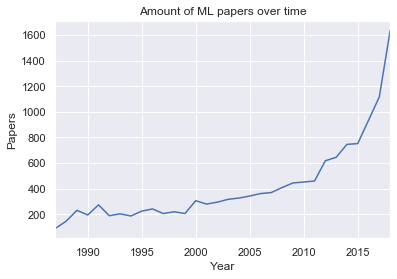

In [29]:
ml_papers = dblp[dblp.conference.isin(mlconf)]
ml_papers.year.value_counts().sort_index().plot()
plt.title("Amount of ML papers over time")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.show()

Check if there are any more missing values

In [30]:
dblp.isnull().sum()

id              0
authors         0
year          634
title           0
conference      0
dtype: int64

Strip all publications for which the year isn't mentioned

In [31]:
dblp = dblp[~dblp.year.isnull()]

Finally we recreate the author oritended data frame using the clean data

In [32]:
authors = pd.DataFrame(dblp.authors.str.split(',', expand=True), index=dblp.index).stack()
authors = authors.reset_index()
authors = authors.drop(columns=['level_1'])
authors.columns = ['id', 'author']
authors.author = authors.author.str.replace("'", "")
authors = authors.drop(authors[authors.author == ''].index, axis=0)
authors = pd.merge(authors, dblp.drop(columns=['authors']), left_on="id", right_index=True)
authors = authors.drop(columns=['id', 'id_x'])
authors = authors.rename(columns={'id_y':'id'})
authors.author = authors.author.str.strip()
# Delete Sheila A. McIlraith and Satinder P. Singh papers of 2018 and 2017 at aaai
authors = authors.drop(authors.query("author == 'Sheila A. McIlraith' and year=='2018.0' and conference=='aaai'").index, axis=0)
authors = authors.drop(authors.query("author == 'Satinder P. Singh (ed.)' and year=='2017.0' and conference=='aaai'").index, axis=0)
# Remove duplicates
authors = authors.drop(authors[authors.duplicated(subset=['id','author'], keep='first')].index, axis=0)

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

We construct the 'activity interval'for each author, by substracting the last publication year, with the earliest one and adding 1 (for ex. 2016-2017 means two years of activity).

In [33]:
authors_min = authors.groupby(authors.author).year.min()
authors_max = authors.groupby(authors.author).year.max()
authors_interval = authors_max - authors_min + 1 # + 1 because same min and max is still 1 year of activity
print("Activity Interval' for all authors:")
print(authors_interval.head())

Activity Interval' for all authors:
author
"Aaron DSouza"         5.0
"Abidalrahman Mohd"    1.0
"Adam ODonovan"        1.0
"Ahuva Mualem"         1.0
"Ala Qadi"             1.0
Name: year, dtype: float64


Check if any intervals are equal to zero (should be impossible) and check for outliers

Are there intervals equal to 0? No.


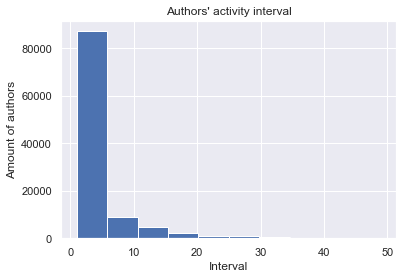

In [34]:
plt.hist(authors_interval)
plt.title("Authors' activity interval")
plt.xlabel("Interval")
plt.ylabel("Amount of authors")
# check if no interval is 0
print(f"Are there intervals equal to 0? {'Yes.' if (authors_interval == 0.).all() else 'No.'}")

This plot is not very useful, so we create another histogram, but this time with a logarithmic scaling of the y-axis.

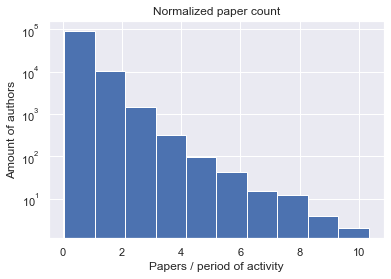

In [35]:
paper_counts = authors.groupby(authors.author).id.count()
normalized_papers = paper_counts / authors_interval
normalized_papers.sort_values(ascending=False)
plt.hist(normalized_papers, log=True)
plt.title("Normalized paper count")
plt.xlabel("Papers / period of activity")
plt.ylabel("Amount of authors")
plt.show()

It is now clear that this distribution does indeed follow a particular law: the exponnential law, a relative change in the normalized paper count, results in a proportional relative change in the number of authors with this normalized paper count. This shows that almost all authors have very 'common' activity intervals, and the larger occurances are rather rare.

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

We just group the author centric data frame by author and then aggregate using the count value to count how many papers each author has published

In [36]:
authors_grouped = authors.groupby('author')
naive_score = authors_grouped.count().title
naive_score = naive_score.sort_values(ascending=False)
naive_score = naive_score.reset_index().rename(columns={'title':'score'})
naive_score.head(20)

,author,score
0,Luc Van Gool,219
1,Toshio Fukuda,196
2,Thomas S. Huang,186
3,Michael I. Jordan,168
4,Trevor Darrell,158
5,Shuicheng Yan,154
6,Takeo Kanade,151
7,Xiaoou Tang,150
8,Dan Roth,144
9,Vijay Kumar 0001,143


Here is the distribution of the score. We again scale the y axis by taking the logarithm to be able to see the high score

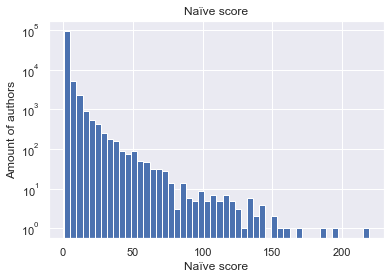

In [37]:
fig, ax = plt.subplots()
naive_score.score.hist(ax = ax, bins=50)
ax.set_yscale('log')
plt.title("Naïve score")
plt.xlabel("Naïve score")
plt.ylabel("Amount of authors")
plt.show()

In [38]:
len(naive_score[naive_score.score==1])/len(naive_score)

0.5966446815938706

Almost 60% of the author just have published one paper and then have a score of 1. It is therefore not a very good ranking !

Here the best authors have more than 150 papers ! But we allow the same weight for each paper which is not the case in practice because some paper are much more important than others. Finally it does not take into account the career duration of the researcher which is very important to not disadvantage young researchers.

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [39]:
h5_index = pd.read_csv('data/aminer_ai.csv', sep=";")
h5_index['Short Name'] = h5_index['Short Name'].str.lower()
h5_index.sort_values("H5-Index", ascending=False)

,Rank,Conference (Full Name),Short Name,H5-Index
0,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112
1,2,IEEE Transactions on Pattern Analysis and Mach...,tpami,101
2,3,Expert Systems with Applications,expert syst. appl.,59
4,5,IEEE International Conference on Robotics and ...,icra,58
5,6,International Conference on Computer Vision,iccv,58
...,...,...,...,...
92,93,ACM Transactions on Asian Language Information...,talip,3
93,94,Autonomous Agents and Multi-Agent Systems,aamas,1
94,95,International Conference on Automatic Face and...,fgr,1
95,96,Knowledge-Based Systems,kbs,0


We join the data frame of the h5 index and the author centric dataframe using the short name of the conference

In [40]:
authors_conf = pd.merge(authors, h5_index, left_on='conference', right_on='Short Name', how='left')
# Remove duplicates
authors_conf = authors_conf.drop(authors_conf[authors_conf.duplicated(subset=['id','author'], keep='first')].index, axis=0)
authors_conf.head()

,author,id,year,title,conference,Rank,Conference (Full Name),Short Name,H5-Index
0,Yoshinori Kuno,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv,6,International Conference on Computer Vision,iccv,58
1,Yasukazu Okamoto,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv,6,International Conference on Computer Vision,iccv,58
2,Satoshi Okada,conf/iccv/KunoOO90,1990.0,Object recognition using a feature search stra...,iccv,6,International Conference on Computer Vision,iccv,58
3,Sundar Vedula,conf/iccv/VedulaBRCK99,1999.0,Three-Dimensional Scene Flow.,iccv,6,International Conference on Computer Vision,iccv,58
4,Simon Baker,conf/iccv/VedulaBRCK99,1999.0,Three-Dimensional Scene Flow.,iccv,6,International Conference on Computer Vision,iccv,58


***B2.2***

We again group by author and compute the sum of the H5 index of each paper published by each author then we sort using the score to get the ranking.

In [41]:
h5_ranking = authors_conf.groupby('author').sum()['H5-Index'].sort_values(ascending=False)
h5_ranking = h5_ranking.reset_index().rename(columns={'H5-Index':'score'})
h5_ranking.head(20)

,author,score
0,Luc Van Gool,18644
1,Thomas S. Huang,14052
2,Xiaoou Tang,13190
3,Trevor Darrell,12763
4,Shuicheng Yan,12448
5,Toshio Fukuda,11368
6,Marc Pollefeys,11265
7,Larry S. Davis,11141
8,Martial Hebert,10629
9,Takeo Kanade,10569


***B2.3***

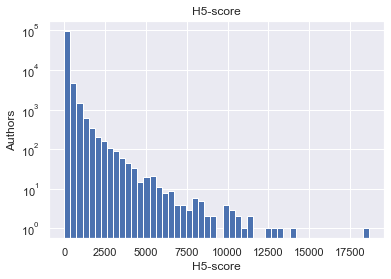

In [42]:
fig, ax = plt.subplots()
h5_ranking["score"].hist(ax = ax, bins=50)
ax.set_yscale('log')
plt.title("H5-score")
plt.xlabel("H5-score")
plt.ylabel("Authors")
plt.show()

The results are different here because we use as a score for each author the sum of the H5-index of the conference where he published his results. Using that we allow more importance to paper published in bigger conferences which are likely to be more important than papers published in smaller conferences. Now  researchers who published few paper in big conferences will have a higher score than those who published more paper in smaller conferences.

In [43]:
naive_score["rank"] = naive_score.score.rank(ascending=False).astype(int)
h5_ranking["rank"] = h5_ranking.score.rank(ascending=False).astype(int)
print("Authors that are favoured by the H5 ranking:")
display(h5_ranking[h5_ranking["rank"] <= 20].merge(naive_score[naive_score["rank"] > 20], how='inner', on='author', suffixes=('_h5', '_naive')))
print("Authors that are favoured by the naive ranking:")
display(h5_ranking[h5_ranking["rank"] > 20].merge(naive_score[naive_score["rank"] <= 20], how='inner', on='author', suffixes=('_h5', '_naive')))

Authors that are favoured by the H5 ranking:


,author,score_h5,rank_h5,score_naive,rank_naive
0,Pascal Fua,10284,11,114,37
1,Ming-Hsuan Yang 0001,10230,12,124,24
2,Mubarak Shah,10224,13,112,40
3,Jitendra Malik,9973,14,116,34
4,Xiaogang Wang,9957,15,111,41
5,Alan L. Yuille,9865,17,125,23
6,Bernt Schiele,9272,18,99,57
7,Rama Chellappa,8981,19,119,28


Authors that are favoured by the naive ranking:


,author,score_h5,rank_h5,score_naive,rank_naive
0,Vijay Kumar 0001,8334,24,143,10
1,Roland Siegwart,8111,28,137,13
2,Wolfram Burgard,7879,31,141,12
3,Eric P. Xing,7812,33,137,13
4,Bernhard Schölkopf,7167,39,133,20
5,Dan Roth,5933,61,144,9
6,Christopher D. Manning,5657,67,136,15
7,Dan Klein,5314,84,134,18


There are 8 authors which are ranked in the 20 first best authors using the naive rank and disapear from the 20 first best author using the H5 score. There are 2 authors which are ranked after the 60th position using the H5 score. It means that these authors have published a lot of papers but have never (or almost never) published in conference having a big h5 index.

***B2.4***

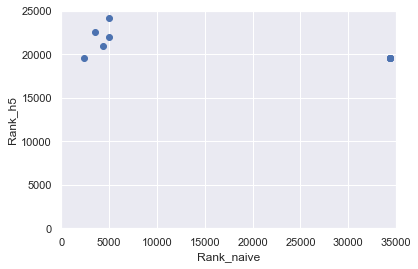

,author,score_naive,rank_naive,score_h5,rank_h5
0,Hy Murveit,17,2382,170,19589
1,Mengjie Zhang,13,3541,140,22621
2,Naokazu Yokoya,11,4408,158,20999
3,Sebastian Otte,10,5026,148,22003
4,Jianwu Dang,10,5026,122,24148
5,Yukihiro Nakamura,2,34330,170,19589
6,Steffen Abraham,2,34330,170,19589
7,Parag Havaldar,2,34330,170,19589
8,Charles Freundlich,2,34330,170,19589
9,Iljung S. Kwak,2,34330,170,19589


In [44]:
selected_authors = pd.read_csv('data/list_of_selected_authors.txt', names=['author'])
selected_naive = naive_score[naive_score.author.isin(selected_authors.author)]
selected_h5 = h5_ranking[h5_ranking.author.isin(selected_authors.author)]
selected_naive_h5 = pd.merge(selected_naive, selected_h5, on="author", suffixes=('_naive', '_h5'))
plt.scatter(selected_naive_h5.rank_naive, selected_naive_h5.rank_h5)
plt.xlim((0, 35000))
plt.ylim((0, 25000))
plt.xlabel("Rank_naive")
plt.ylabel("Rank_h5")
plt.show()
display(selected_naive_h5)

We can see that the selected authors can be split in two clusters: those with a bad h5 rank either have a very good, or a very bad naive rank. Furthermore, the person with the most paper (Hy Murveit) has the same h5 score as people having only 2 papers which means that even if he published a lot of papers, its paper were published in small conferences and then are not likely to be a huge impact of the state of the art.

***B2.5***

In [45]:
authors[authors.author.isin(h5_ranking.head(5).author)].conference.value_counts()

cvpr     476
iccv     176
nips      54
fgr       38
aaai      33
accv      25
ijcai     20
icra      20
icml      19
emnlp      3
naacl      2
icann      1
Name: conference, dtype: int64

In [46]:
h5_index[h5_index['Short Name'].isin(authors.conference.unique())].head()[['Short Name', 'H5-Index']]

,Short Name,H5-Index
0,cvpr,112
4,icra,58
5,iccv,58
6,icml,56
7,nips,51


We can see that the cvpr conference has an H5 index much bigger than the other conferences and then the top ranked author according to this H5 index are those which have published a lot during this conference.
Even if the conference has a great h5 index it does not mean that all the paper published in that conference have a big influence in the scientific world. 

Moreover, conference are usually specialized in one field (for example cvpr is specialized in computer vision). This means that researchers could be favoured for the field the are in, and not the quality of their research.

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

What we did in part A4, is the normalized ranking of the naive ranking made in part B1.
We can make the same with the h5 index

In [47]:
authors_h5_naive = pd.merge(h5_ranking, naive_score, on="author", how="inner", suffixes=("_h5", "_naive"))
authors_h5_naive_interval = pd.merge(authors_h5_naive, authors_interval, on="author", how="inner").rename(columns={"year": "activity"})
authors_h5_naive_interval["score_fair"] = authors_h5_naive_interval["score_h5"] / authors_h5_naive_interval["activity"]
authors_fair = authors_h5_naive_interval[["author", "score_fair"]]
display(authors_fair.sort_values(by="score_fair", ascending=False))

,author,score_fair
384,Li Fei-Fei 0001,953.333333
2,Xiaoou Tang,824.375000
4,Shuicheng Yan,732.235294
69,Jiashi Feng,700.875000
0,Luc Van Gool,642.896552
...,...,...
104869,Modesto Castrillón Santana,0.200000
104832,Peter Gerhardstein,0.181818
101171,Hasan Demirel,0.181818
104868,Nese Alyüz,0.181818


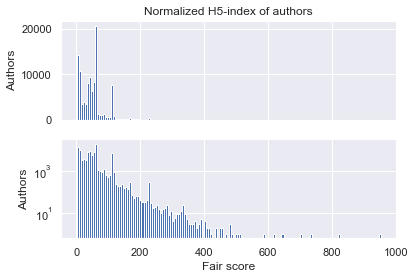

In [48]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].set_title("Normalized H5-index of authors")
ax[0].set_ylabel("Authors")
ax[0].hist(authors_fair["score_fair"], bins=150)
ax[1].hist(authors_fair["score_fair"], bins=150,log=True)
plt.ylabel("Authors")
plt.xlabel("Fair score")
plt.show()

In [49]:
authors_fair.score_fair.value_counts()

58.000000     19848
4.000000       8968
112.000000     7142
44.000000      6449
35.000000      5350
              ...  
3.350000          1
217.576923        1
19.230769         1
25.150000         1
267.300000        1
Name: score_fair, Length: 7447, dtype: int64

In [50]:
h5_index[h5_index['H5-Index'] == 58]

,Rank,Conference (Full Name),Short Name,H5-Index
3,4,International Journal of Computer Vision,ijcv,58
4,5,IEEE International Conference on Robotics and ...,icra,58
5,6,International Conference on Computer Vision,iccv,58


In [51]:
len(authors[authors.conference.isin(['ijcv', 'icra', 'iccv'])])/len(authors)

0.26598114380439286

We can see that there is a huge peak which is not trivial. Indeed almost 20 000 athors have a h5 score of exactly 58. After some research we can see that the conferences with an H5 index of 58 represent 26% of the authors dataset which means that this peak is consitued by authors that published only one paper in one of these famous conference.

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [52]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [53]:
dblp2 = dblp.title.apply(stopword_remover)
dblp2 = dblp2.apply(lowercase_all)
dblp2 = dblp2.apply(remove_punct)
dblp2.head()

0    object recognition using feature search strate...
1                          threedimensional scene flow
2    fluid motion recovery coupling dense parametri...
3    qualitative 3d shape reconstruction using dist...
4    gplac generalizing visionbased robotic skills ...
Name: title, dtype: object

In [54]:
words_symbolic = ['logic', 'planning', 'control']
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']

Create the `symbolic` DataFrame, only containing papers about the symbolic approach to AI

In [55]:
symbolic = pd.Series()
for word in words_symbolic:
    symbolic = pd.concat((symbolic, dblp2[dblp2.str.find(word) != -1]))
symoblic = symbolic.drop_duplicates()

Create the `connectionist` DataFrame, only containing papers about the connectionist approach to AI

In [56]:
connectionist = pd.Series()
for word in words_connectionist:
    connectionist = pd.concat((connectionist, dblp2[dblp2.str.find(word) != -1]))
connectionist = connectionist.drop_duplicates()

Create DataSeries that map a given year to the number of papers published about the respectively the connectionist and symbolic approach to AI

In [57]:
conn_counts = pd.merge(connectionist.rename("conn"), dblp, left_index=True, right_index=True)["year"].value_counts()
symb_counts= pd.merge(symbolic.rename("symb"), dblp, left_index=True, right_index=True)["year"].value_counts()

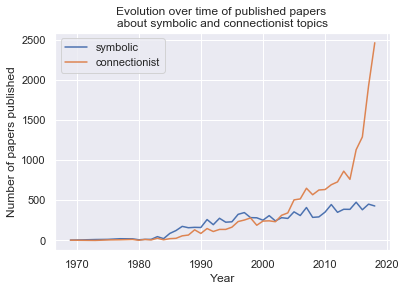

In [58]:
plt.plot(symb_counts.sort_index(), label="symbolic")
plt.plot(conn_counts.sort_index(), label="connectionist")
plt.title("Evolution over time of published papers \nabout symbolic and connectionist topics")
plt.xlabel("Year")
plt.ylabel("Number of papers published")
plt.legend()
plt.show()

1. It is clear that, while actually both counts rise, that in recent years the number of papers on the 'connectionist' side of AI has exploded. You can conclude that the connectionist approach to AI has taken over.
2. This checks out with our background knowledge: almost all recent developments in AI were enable by deep learning.

In [59]:
symbolic = dblp.loc[symbolic.index]
connectionist = dblp.loc[connectionist.index]
conference_counts = pd.DataFrame({'connectionist':dblp.loc[connectionist.index].conference.value_counts(), 'symbolic':dblp.loc[symbolic.index].conference.value_counts()})
conference_counts.head()

,connectionist,symbolic
aaai,1888,1065
aamas,64,33
accv,400,28
acl,817,195
cvpr,2372,172


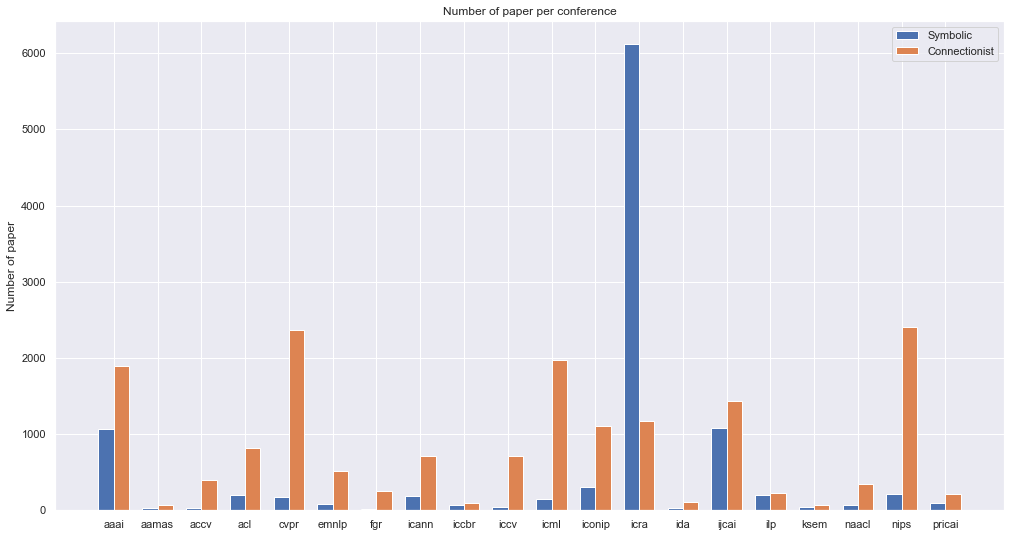

In [60]:
ind = np.arange(len(conference_counts))  # the x locations for the groups
width = 0.35  # the width of the bars
sb.set(rc={'figure.figsize':(17,9)})
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, conference_counts.symbolic, width,
                label='Symbolic')
rects2 = ax.bar(ind + width/2, conference_counts.connectionist, width,
                label='Connectionist')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of paper')
ax.set_title('Number of paper per conference')
ax.set_xticks(ind)
ax.set_xticklabels([x for x in conference_counts.index])
ax.legend()
plt.show()

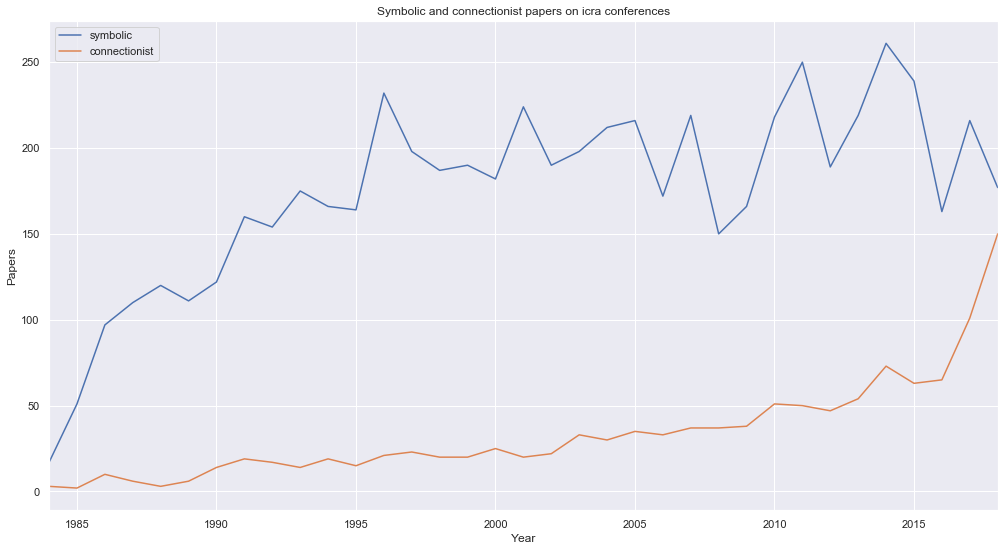

In [61]:
symbolic[symbolic.conference == 'icra'].year.value_counts().sort_index(ascending=False).plot(label="symbolic")
connectionist[connectionist.conference == 'icra'].year.value_counts().sort_index(ascending=False).plot(label="connectionist")
plt.title("Symbolic and connectionist papers on icra conferences")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.legend()
plt.show()

It can be seen that most of the symbolic papers are published in the icra conference. The last chart shows that even in that conference the number of symbolic paper remains constant while the number of connectionist paper grows a lot in the last few years.

So we can conclude that the number of connectionnist papers effectively grows a lot in the last years.

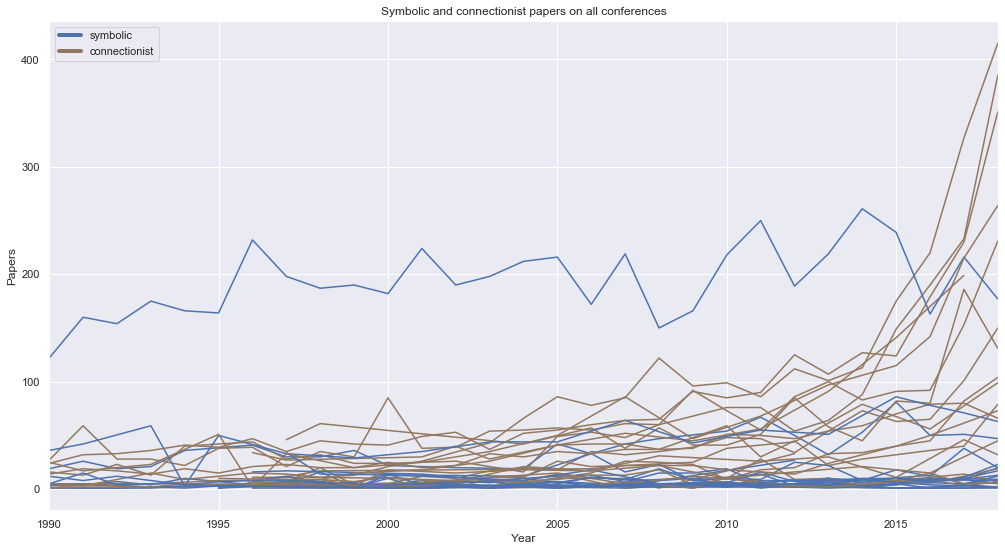

In [62]:
from matplotlib.lines import Line2D
for conference in conference_counts.index:
    symbolic[symbolic.conference == conference].year.value_counts().sort_index(ascending=False).plot(color="C0")
    connectionist[connectionist.conference == conference].year.value_counts().sort_index(ascending=False).plot(color="C5")
plt.title("Symbolic and connectionist papers on all conferences")
plt.xlim(1990)
plt.xlabel("Year")
plt.ylabel("Papers")
custom_lines = [Line2D([0], [0], color="C0", lw=4),
                Line2D([0], [0], color="C5", lw=4)]
plt.legend(custom_lines, ['symbolic', 'connectionist'])
plt.show()